In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Path of source files

In [0]:
basepath = 'F://JavaWorkspace//'

#basepath = 'F://JavaWorkspace//AST_Compile\\src\\com\\nabeelkhan\\ast_paerser_py4j\\'

### Define the source code language 

In [0]:
ext = ['.java']

### Walking a directory tree and fatch source files

In [0]:
dt = [];
for dirpath, dirnames, files in os.walk(basepath):
    #print(f'Found directory: {dirpath}')
    for f in files:
        for e in ext:
            if(str(f).find(e) != -1):
                if((str(f).find(e)+len(e)) == len(f)):
                    #print(dirpath," - ",str(f)," - ",str(f).find(e)," - ",len(f))    
                    with open(dirpath+"\\"+f, 'r') as f:
                        data = f.read()
                        dt.append({
                                "hash":hash(str(f.name)),
                                "path":f.name,
                                "source_code":data
                             })
                        #print(dt);


###  Init DataFrame

In [0]:
dataFrameSource = pd.DataFrame(dt)
dataFrameSource

,hash,path,source_code
0,-2897302942833988625,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
1,6088565061916337128,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
2,8442624749195594999,F://JavaWorkspace//AST_Paerser_PY4J\src\main\j...,"/*\n * To change this license header, choose L..."
3,2592990512713215422,F://JavaWorkspace//AST_Paerser_PY4J\src\main\j...,"/*\n * To change this license header, choose L..."
4,-4462275812234831606,F://JavaWorkspace//AST_PY4J_Compiler\src\Test\...,package Test;\n/*\n * To change this license h...
...,...,...,...
62,1546399024731813968,F://JavaWorkspace//PythonGateway\src\py4j\test...,package py4j.test;\n\nimport py4j.GatewayServe...
63,4158199818794753169,F://JavaWorkspace//Test\src\main\java\Test.java,"/*\n * To change this license header, choose L..."
64,8786451295013556227,F://JavaWorkspace//Thrade\src\carrace\Car.java,package carrace;\n\npublic class Car implement...
65,5093914090799633673,F://JavaWorkspace//Thrade\src\carrace\Main.java,"/*\n * To change this license header, choose L..."


In [0]:
dataFrameSource.path[0]

'F://JavaWorkspace//AST_Compile\\src\\com\\nabeelkhan\\ast_paerser_py4j\\Code_Similarity.java'

#### TODO: For Multiple Project in provided root path 

# Try to get the Code similarity ratio using Text Similarity

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

**Codes Samples for Testing**

In [0]:
code_1 = """ 
import java.security.MessageDigest;

public class Program {
	
    public static String getSHA256(String str) {
       
    	//return SHA_256(str);
        
    	return mySHA_256(str);
        
    }


    public static String mySHA_256(String s){

    	byte[] bytes = s.getBytes();
  	  	StringBuilder binary = new StringBuilder();
  	  	
  	  	for (byte b : bytes)
  	  	{
  	     int val = b*99;	
  	     for (int i = 0; i < 8; i++)
  	     {
  	        binary.append((val & 128) == 0 ? 0 : 1);
  	        val <<= 1;
  	     }
  	  }

  	  //String[] hex={"f","e","d","c","b","a","9","8","7","6","5","4","3","2","1"};
  	  int[] weight = {8,4,2,1};
  	  int inCont = 0;
  	  String[] hex={"0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f"};
  	  String hexdecnum="";
        
  	  int rem,x = 0;
  	  for(int i=0;i<binary.length();i++)
  	   {
  		  
  		  if(i%4 == 0 && i!=0)
  		  {
  			  hexdecnum += hex[x];
  			  inCont=0;
  	    	  x = 0;
  		  }
  		  else if(i>=binary.length()-1)
  			  hexdecnum += hex[x];
  	   
  	    rem = binary.charAt(i);
  		inCont++;
  	    if(rem ==49){
  	    	if(inCont==1){	x+=weight[0];	}
  	    	else if (inCont==2){	x+=weight[1];	}
  	    	else if (inCont==3){	x+=weight[2];	}
  	    	else if (inCont==4){	x+=weight[3];	}
  	    	
  	    }
  	   }
    	 return hexdecnum;
    }


  
    
    
    
    
    
    
    private static String SHA_256(String str) {
		MessageDigest messageDigest;
        String encodeStr = "";
        try {
            messageDigest = MessageDigest.getInstance("SHA-256");
            messageDigest.update(str.getBytes("UTF-8"));
            encodeStr = byte2Hex(messageDigest.digest());
        } catch (Exception e) {
            System.out.println("getSHA256 is error" + e.getMessage());
        }
        return encodeStr;
	}

    private static String byte2Hex(byte[] bytes) {
        StringBuilder builder = new StringBuilder();
        String temp;
        for (int i = 0; i < bytes.length; i++) {
            temp = Integer.toHexString(bytes[i] & 0xFF);
            if (temp.length() == 1) {
                builder.append("0");
            }
            builder.append(temp);
        }
        return builder.toString();
    }
}
"""

In [0]:
code_2 = """ import java.security.MessageDigest;

public class HashTest {
	
	
	
	
    public static void main(String[] args){

    	String s = "1524405906978Genisis Block0";
    	  byte[] bytes = s.getBytes();
    	  StringBuilder binary = new StringBuilder();
    	  for (byte b : bytes)
    	  {
    	     int val = b;	//%23249425;
    	     for (int i = 0; i < 8; i++)
    	     {
    	        binary.append((val & 128) == 0 ? 0 : 1);
    	        val <<= 1;
    	     }
    	   //  binary.append(" ");
    	  }
    	  
    	  System.out.println("'" + (int) s.charAt(0) + "'\n to binary: " + binary);

    	  //String[] hex={"f","e","d","c","b","a","9","8","7","6","5","4","3","2","1"};
    	  int[] weight = {8,4,2,1};
    	  int inCont = 0;
    	  String[] hex={"0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f"};
    	  String hexdecnum="";
          
    	  int rem,x = 0;
    	  for(int i=0;i<binary.length();i++)
    	   {
    		  
    		  if(i%4 == 0 && i!=0)
    		  {
    			  hexdecnum += hex[x];
    			  inCont=0;
    	    	  x = 0;
    		  }
    		  else if(i>=binary.length()-1)
    			  hexdecnum += hex[x];
    	   
    	    rem = binary.charAt(i);
    		inCont++;
    	    if(rem ==49){
    	    	if(inCont==1){	x+=weight[0];	}
    	    	else if (inCont==2){	x+=weight[1];	}
    	    	else if (inCont==3){	x+=weight[2];	}
    	    	else if (inCont==4){	x+=weight[3];	}
    	    	
    	    }
    	   }
    	  System.out.println("\n to Hex: " + hexdecnum + "\n size: " + hexdecnum.length());
    	  }

    	public String getSHA256(String str) {	     
		    String encodedString = "";
		       int i=0;
		       while(i<str.length()){
		    	   int sum = (int) str.charAt(i) * 99; 
		    	   i++;
		       }
		    	
		       return encodedString;
		    	// return SHA256(str);
		    }

	private static String SHA256(String str) {
		MessageDigest messageDigest;
        String encodeStr = "";
        try {
            messageDigest = MessageDigest.getInstance("SHA-256");
            messageDigest.update(str.getBytes("UTF-8"));
            encodeStr = byte2Hex(messageDigest.digest());
        } catch (Exception e) {
            System.out.println("getSHA256 is error" + e.getMessage());
        }
        return encodeStr;
	}

    private static String byte2Hex(byte[] bytes) {
        StringBuilder builder = new StringBuilder();
        String temp;
        for (int i = 0; i < bytes.length; i++) {
            temp = Integer.toHexString(bytes[i] & 0xFF);
            if (temp.length() == 1) {
                builder.append("0");
            }
            builder.append(temp);
        }
        return builder.toString();
    }
}"""

In [0]:
code_3 =""" public class Test {

	public static void main(String[] args) {
		
		
		example of java ArrayList hash function
		String[] list1 = {"a","b","c"};
		String[] list2 = {"aa","b","c"};
		System.out.println(Arrays.hashCode(list1));
		System.out.println(Arrays.hashCode(list2));
		
		BlockChain blockChain1 = new BlockChain();
			
			Block newBlock1 = blockChain1.generateNextBlock("ffffffff");
			blockChain1.addBlock(newBlock1);
			
			Block newBlock2 = blockChain1.generateNextBlock("gggggggg");
			blockChain1.addBlock(newBlock2);
			
			Block newBlock3 = blockChain1.generateNextBlock("hhhhhhhh");
			blockChain1.addBlock(newBlock3);
			
			Block newBlock4 = blockChain1.generateNextBlock("iiiiiiii");
			blockChain1.addBlock(newBlock4);
			
			System.out.println(blockChain1.toString());
			new nonStaticThrades();
			
			
		}

}"""

In [0]:
dataFrame = pd.DataFrame(data={'hash':[1,2,3],'source_code':[code_1.replace('\n',''),code_2.replace('\n',''),code_3.replace('\n','')]})
data= dataFrame.source_code
print(data)

0     import java.security.MessageDigest;public cla...
1     import java.security.MessageDigest;public cla...
2     public class Test {\tpublic static void main(...
Name: source_code, dtype: object


# **Create the Document Term Matrix**


In [0]:
vect=CountVectorizer()
sparse_matrix = vect.fit_transform(dataFrame.source_code)
sparse_matrix.toarray()

array([[ 1,  1,  0,  0,  1,  1,  1,  0,  0,  3,  0,  0,  0,  5,  0,  0,
         0,  0,  4,  3,  2,  5,  1,  1,  1,  1,  4,  0,  3,  1,  0,  1,
         0,  4,  0,  0,  2,  1,  1,  2,  0,  0,  0,  0,  4,  4,  0,  8,
         0,  1,  7,  7,  1,  1,  1,  4,  0,  0,  0,  7,  2,  2,  0,  0,
         0,  0,  0,  0,  1,  1,  2,  1,  3,  3,  5,  1,  1,  0,  2,  0,
         4,  5, 12,  4,  0,  1,  4,  0,  0,  1,  1,  1,  1,  1,  3,  0,
         5,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  0,  0,  4,  1,  0,  0,  8,  0,  1,
         0,  0,  4,  3,  2,  5,  1,  3,  1,  1,  4,  2,  3,  1,  0,  1,
         0,  4,  0,  0,  2,  1,  1,  2,  0,  0,  0,  1,  5,  5,  0,  8,
         0,  1,  7, 11,  1,  1,  1,  6,  0,  0,  1,  7,  0,  2,  0,  0,
         0,  0,  0,  0,  3,  3,  2,  0,  3,  3,  4,  1,  1,  2,  0,  1,
         3,  6, 13,  4,  1,  3,  4,  0,  2,  1,  1,  1,  1,  1,  3,  1,
         5,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  4,  0,  1,  1,  2,  0,  4,  0,
         2, 10,  0,  0,  0,  0

In [0]:
print(vect.get_feature_names())

['0xff', '128', '1524405906978genisis', '23249425', '256', '49', '99', 'aa', 'addblock', 'append', 'args', 'arraylist', 'arrays', 'binary', 'block', 'block0', 'blockchain', 'blockchain1', 'builder', 'byte', 'byte2hex', 'bytes', 'catch', 'charat', 'class', 'digest', 'else', 'encodedstring', 'encodestr', 'error', 'example', 'exception', 'ffffffff', 'for', 'function', 'generatenextblock', 'getbytes', 'getinstance', 'getmessage', 'getsha256', 'gggggggg', 'hash', 'hashcode', 'hashtest', 'hex', 'hexdecnum', 'hhhhhhhh', 'if', 'iiiiiiii', 'import', 'incont', 'int', 'integer', 'is', 'java', 'length', 'list1', 'list2', 'main', 'messagedigest', 'mysha_256', 'new', 'newblock1', 'newblock2', 'newblock3', 'newblock4', 'nonstaticthrades', 'of', 'out', 'println', 'private', 'program', 'public', 'rem', 'return', 'security', 'sha', 'sha256', 'sha_256', 'size', 'static', 'str', 'string', 'stringbuilder', 'sum', 'system', 'temp', 'test', 'to', 'tohexstring', 'tostring', 'try', 'update', 'utf', 'val', 'voi

# **Create the Document Term Matrix**


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
tfidf = TfidfTransformer(norm=None)
tfidf

TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
tfidf_transformer = TfidfTransformer(norm=None)
tfidf_transformer

TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
tfidf = tfidf_transformer.fit_transform(sparse_matrix)
tfidf

<3x98 sparse matrix of type '<class 'numpy.float64'>'
	with 168 stored elements in Compressed Sparse Row format>

In [0]:
tfidf.toarray()

array([[ 1.28768207,  1.28768207,  0.        ,  0.        ,  1.28768207,
         1.28768207,  1.28768207,  0.        ,  0.        ,  3.86304622,
         0.        ,  0.        ,  0.        ,  6.43841036,  0.        ,
         0.        ,  0.        ,  0.        ,  5.15072829,  3.86304622,
         2.57536414,  6.43841036,  1.28768207,  1.28768207,  1.        ,
         1.28768207,  5.15072829,  0.        ,  3.86304622,  1.28768207,
         0.        ,  1.28768207,  0.        ,  5.15072829,  0.        ,
         0.        ,  2.57536414,  1.28768207,  1.28768207,  2.57536414,
         0.        ,  0.        ,  0.        ,  0.        ,  5.15072829,
         5.15072829,  0.        , 10.30145658,  0.        ,  1.28768207,
         9.01377451,  9.01377451,  1.28768207,  1.28768207,  1.        ,
         5.15072829,  0.        ,  0.        ,  0.        ,  9.01377451,
         3.38629436,  2.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1. 

### **Convert Matrix to  Dataframe**


In [0]:
df = pd.DataFrame(sparse_matrix.toarray(), 
                  columns=vect.get_feature_names(), 
                  index=['code_1', 'code_2','code_3'])

In [0]:
df.head()

,0xff,128,1524405906978genisis,23249425,256,49,99,aa,addblock,append,...,to,tohexstring,tostring,try,update,utf,val,void,weight,while
code_1,1,1,0,0,1,1,1,0,0,3,...,0,1,1,1,1,1,3,0,5,0
code_2,1,1,1,1,1,1,1,0,0,4,...,2,1,1,1,1,1,3,1,5,1
code_3,0,0,0,0,0,0,0,1,4,0,...,0,0,1,0,0,0,0,1,0,0


In [0]:
df[:1][:]

,0xff,128,1524405906978genisis,23249425,256,49,99,aa,addblock,append,...,to,tohexstring,tostring,try,update,utf,val,void,weight,while
code_1,1,1,0,0,1,1,1,0,0,3,...,0,1,1,1,1,1,3,0,5,0


# **Compute Cosine Similarity**

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
df_cs = pd.DataFrame(cosine_similarity(df))
df_cs


,0,1,2
0,1.000000,0.959104,0.145611
1,0.959104,1.000000,0.175012
2,0.145611,0.175012,1.000000


## Plot Heat Map


In [0]:
import seaborn as sns;

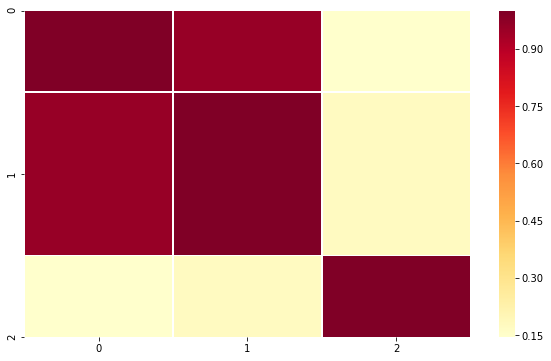

In [0]:
#sns.heatmap(df_cs)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cs, linewidths=.5,cmap='YlOrRd')
#plt.pcolor(df_cs)
#plt.yticks(np.arange(0.5, len(df_cs.index), 1), df_cs.index)
#plt.xticks(np.arange(0.5, len(d.columns), 1), df.columns)
#plt.show()

#  **Using Py4J without pre-determined ports (dynamic port number)**
 

In [0]:
from py4j.java_gateway import (
    JavaGateway, CallbackServerParameters, GatewayParameters,
    launch_gateway)


par = CallbackServerParameters(
    address='127.0.0.1',
    port=25334,
    daemonize=False,
    daemonize_connections=False,
    eager_load=True,
    ssl_context=None,
    accept_timeout='DEFAULT',
    read_timeout=None,
    propagate_java_exceptions=False,
    auth_token=None,
)


##  Start Gateway
 

In [0]:

gateway = JavaGateway(callback_server_parameters=par)
print("gateway.gateway_parameters.port",gateway.gateway_parameters.port)
# retrieve the port on which the python callback server was bound to

python_port = gateway.get_callback_server().get_listening_port()
print("get_callback_server python_port: ",python_port)

gateway.gateway_parameters.port 25333
get_callback_server python_port:  25334


## Call For shutdown

In [0]:
#gateway.shutdown()


# launch Java side with dynamic port and get back the port on which the
# server was bound to.
#port = launch_gateway 
''' launch_gateway(
    port=0,
    jarpath='',
    classpath='',
    javaopts=[],
    die_on_exit=True,
    redirect_stdout=None,
    redirect_stderr=None,
    daemonize_redirect=True,
    java_path='java',
    create_new_process_group=False,
    enable_auth=False,
    cwd=None,
    return_proc=False,
)

# connect python side to Java side with Java dynamic port and start python
# callback server with a dynamic port
gateway = JavaGateway(
    gateway_parameters=GatewayParameters(port=port),
    callback_server_parameters=CallbackServerParameters(port=0))

# tell the Java side to connect to the python callback server with the new
# python port. Note that we use the java_gateway_server attribute that
# retrieves the GatewayServer instance.
gateway.java_gateway_server.resetCallbackClient(
    gateway.java_gateway_server.getCallbackClient().getAddress(),
    python_port)

'''



" launch_gateway(\n    port=0,\n    jarpath='',\n    classpath='',\n    javaopts=[],\n    die_on_exit=True,\n    redirect_stdout=None,\n    redirect_stderr=None,\n    daemonize_redirect=True,\n    java_path='java',\n    create_new_process_group=False,\n    enable_auth=False,\n    cwd=None,\n    return_proc=False,\n)\n\n# connect python side to Java side with Java dynamic port and start python\n# callback server with a dynamic port\ngateway = JavaGateway(\n    gateway_parameters=GatewayParameters(port=port),\n    callback_server_parameters=CallbackServerParameters(port=0))\n\n# tell the Java side to connect to the python callback server with the new\n# python port. Note that we use the java_gateway_server attribute that\n# retrieves the GatewayServer instance.\ngateway.java_gateway_server.resetCallbackClient(\n    gateway.java_gateway_server.getCallbackClient().getAddress(),\n    python_port)\n\n"

#  Acess Java Classes send Source code to AST

In [0]:
dataFrameSource.head()

,hash,path,source_code
0,-2897302942833988625,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
1,6088565061916337128,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
2,8442624749195594999,F://JavaWorkspace//AST_Paerser_PY4J\src\main\j...,"/*\n * To change this license header, choose L..."
3,2592990512713215422,F://JavaWorkspace//AST_Paerser_PY4J\src\main\j...,"/*\n * To change this license header, choose L..."
4,-4462275812234831606,F://JavaWorkspace//AST_PY4J_Compiler\src\Test\...,package Test;\n/*\n * To change this license h...


### Remove Comment 

In [0]:
def removeComment(x):

    a1 = x.find('/*'); b1 = x[a1:].find('*/');
    print(a1,b1)
    if (a1 >= 0 and b1 > 1):
        print(x[a1:b1+2])
        x = str(x).replace(x[a1:b1+2],"");
#        print(x)  
    
    
    a2 = x.find('//'); b2 = x[a2:].find('\n');
    print(a2,b2)  
    if(a2>-1 and b2 > 1):
        print(x[a2:b2])
        x = str(x).replace(str(x[a2:b2]),"");

    a1 = x.find('/*'); b1 = x[a1:].find('*/');
    a2 = x.find('//'); b2 = x[a2:].find('\n');

    if(a1>-1) or (a2>-1):
 #       print(a1,b1,a2,b2)
        removeComment(x);
    
    return x;


####  Test Gateway

In [0]:
#print(code_1.replace("\n","").replace("\t",""))
#gateway.entry_point.run((code_1))
#x = gateway.entry_point.getAst_Map()
#y = gateway.entry_point.getSimpleName()       

In [0]:
ast = [];
for index, row in dataFrameSource.iterrows():
    #print(row.source_code)
    gateway.entry_point.run(row.source_code)
    x = gateway.entry_point.getAst_Map()
    y = gateway.entry_point.getSimpleName()       
    
    ast.append({
        "hash":row.hash,
        "AST": x.toString(),
        "names": y.toString()
        })
                     
    #astDataFrame[index] = astDataFrame.({'AST':x,'SimpleName':y}) 


Save dataFram for Backup

In [0]:
ast_df.to_csv(r'F:\PythonWorkspace\NED_University\Project_TTDS\ast_df.csv')

In [0]:
url = 'https://raw.githubusercontent.com/NabeelShahidKhan/DataScience/master/sourceCode.csv'
#url ='C:\\Users\\nabeels\\Downloads\\DataScience-master\\sourceCode.csv';
ast_df = pd.read_csv(url)

In [36]:
ast_df[:1]

,hash,path,source_code
0,-7210449156072128497,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."


In [0]:
ast_df = pd.DataFrame(ast)
ast_df

,hash,AST,names
0,-2897302942833988625,"{SimpleName:-:println=1, MethodInvocation:-:Sy...","[Code_Similarity, main, String, args, GatewayS..."
1,6088565061916337128,{MethodDeclaration:-:boolean visit(NullLiteral...,"[Similarity_Visitor, ASTVisitor, HashMap, Stri..."
2,8442624749195594999,"{SimpleName:-:println=1, MethodInvocation:-:Sy...","[Code_Similarity, main, String, args, GatewayS..."
3,2592990512713215422,{MethodDeclaration:-:boolean visit(NullLiteral...,"[Similarity_Visitor, ASTVisitor, HashMap, Stri..."
4,-4462275812234831606,{MethodDeclaration:-:boolean visit(NullLiteral...,"[Similarity_Visitor, ASTVisitor, HashMap, Stri..."
...,...,...,...
62,1546399024731813968,"{public Stack getStack()=1, SimpleName:-:Stack...","[StackEntryPoint, Stack, stack, StackEntryPoin..."
63,4158199818794753169,"{NormalAnnotation:-:@Named(value=""test"")=1, Si...","[Named, value, test, Dependent, Test, Test]"
64,8786451295013556227,"{SimpleName:-:println=2, Assignment:-:rest_int...","[Car, Runnable, Person, person, String, carNam..."
65,5093914090799633673,"{ExpressionStatement:-:race.addCar(car2);=1, E...","[Main, main, String, args, Race, setLap_length..."


## Split AST of each source file 

In [0]:
df_ast_data = pd.DataFrame(data=ast_df.AST.to_list(),index=ast_df.hash)
df_ast_data

,0
hash,
-2897302942833988625,"{SimpleName:-:println=1, MethodInvocation:-:Sy..."
6088565061916337128,{MethodDeclaration:-:boolean visit(NullLiteral...
8442624749195594999,"{SimpleName:-:println=1, MethodInvocation:-:Sy..."
2592990512713215422,{MethodDeclaration:-:boolean visit(NullLiteral...
-4462275812234831606,{MethodDeclaration:-:boolean visit(NullLiteral...
...,...
1546399024731813968,"{public Stack getStack()=1, SimpleName:-:Stack..."
4158199818794753169,"{NormalAnnotation:-:@Named(value=""test"")=1, Si..."
8786451295013556227,"{SimpleName:-:println=2, Assignment:-:rest_int..."


## Split names of each source file 

In [0]:
df_simple_Names = pd.DataFrame(data=ast_df.names.to_list(),index=ast_df.hash)
df_simple_Names

,0
hash,
-2897302942833988625,"[Code_Similarity, main, String, args, GatewayS..."
6088565061916337128,"[Similarity_Visitor, ASTVisitor, HashMap, Stri..."
8442624749195594999,"[Code_Similarity, main, String, args, GatewayS..."
2592990512713215422,"[Similarity_Visitor, ASTVisitor, HashMap, Stri..."
-4462275812234831606,"[Similarity_Visitor, ASTVisitor, HashMap, Stri..."
...,...
1546399024731813968,"[StackEntryPoint, Stack, stack, StackEntryPoin..."
4158199818794753169,"[Named, value, test, Dependent, Test, Test]"
8786451295013556227,"[Car, Runnable, Person, person, String, carNam..."


In [0]:
##  AST transformation

In [108]:
x = str('{println=1,System.out.println("Gateway",a);=1, public Stack getStack()=1, Stack=3, race.addCar(car4);=1')
a = split_AST_data(x)
pd.DataFrame(a)

['{println=1', 'System.out.println("Gateway"', 'a);=1', ' public Stack getStack()=1', ' Stack=3', ' race.addCar(car4);=1']


,0
state,"System.out.println(""Gateway"""


In [110]:
import re

text = 'println=1, System.out.println("Gateway",a);=1'

#pattern = r"([A-Z]).(:-:)"

#Check if the string has any characters from a to z lower case, and A to Z upper case:

x = re.findall("\d.", txt)
#print(re.search(pattern, text))
print(x)

if (x):
  print("Yes, there is at least one match!")
else:
  print("No match")


['1,']
Yes, there is at least one match!


In [0]:
#def split_AST_data(x):
  s = x.split(',')
  # city = x.split(':')s[0].strip()
  print(s)
  state = s[1].strip()  
  return pd.Series([state], index=['state'])

In [0]:

df[['city','state']] = df['location'].apply(split_data)
print (df)

In [0]:
new = df_ast_data[0]

In [0]:
new = new.str.split(", ", n = 1, expand = True)

In [0]:
new

,0,1
hash,,
-2897302942833988625,{SimpleName:-:println=1,"MethodInvocation:-:System.out.println(""Gateway..."
6088565061916337128,{MethodDeclaration:-:boolean visit(NullLiteral...,MethodDeclaration:-:boolean visit(SingleMember...
8442624749195594999,{SimpleName:-:println=1,"MethodInvocation:-:System.out.println(""Gateway..."
2592990512713215422,{MethodDeclaration:-:boolean visit(NullLiteral...,MethodDeclaration:-:boolean visit(SingleMember...
-4462275812234831606,{MethodDeclaration:-:boolean visit(NullLiteral...,MethodDeclaration:-:boolean visit(SingleMember...
...,...,...
1546399024731813968,{public Stack getStack()=1,"SimpleName:-:Stack=3, MethodDeclaration:-:publ..."
4158199818794753169,"{NormalAnnotation:-:@Named(value=""test"")=1","SimpleName:-:value=1, MethodDeclaration:-: Tes..."
8786451295013556227,{SimpleName:-:println=2,"Assignment:-:rest_interval=stop - start=1, Inf..."
